# Questions 4 and 5 - TP Non-Bayesian Statistical Hypothesis Testing

By Kevin Michalewicz and Yassine Khalsi 

$
\newcommand{\Rset}{\mathbb{R}}
\newcommand\un{\mathbb 1}
\newcommand{\Hcal}{\mathcal H}
\newcommand{\Ncal}{\mathcal N}
$

Type de diapo

To activate the Latex extensions in this notebook, we follow https://github.com/Jupyter-contrib/jupyter_nbextensions_configurator/issues/133#issuecomment-837994108

1) Open a terminal (for instance, go to the Home Page, open the drop-down menu "New" to the right of the window, beside the drop-down menu "upload", and choose terminal)

2) Type "conda install -c conda-forge jupyter_contrib_nbextensions" in the prompt;

3) After finishing the first step, run "jupyter contrib nbextension install --user" in the prompt;

4) After finishing the second step, run "jupyter nbextensions_configurator enable --user" in the prompt;

5) In this notebook, in the Edit menu, click on "nbextensions config" (at the very bottom of the menu) and tick the case "(some) LaTeX environments for Jupyter"


###### <span style="font-size:140%">
    
__Non-Bayesian binary classification & statistical hypothesis testing__

</span>


Dominique PASTOR (dominique.pastor@imt-atlantique.fr)

Octobre 2021

![](logo-imta.png)

\begin{exercise}

<span style="font-size:80%">

$\|\cdot\|$ stands for the usual Euclidean norm in $\mathbb{R}^N$. Let $X$ be an $N$-dimensional real random vector such that:

$$\begin{cases}\mathcal{H}_0 : & X \sim \mathcal{N}(0,\sigma^2\mathrm{\mathbf{I}}_N) 
\\ \mathcal{H}_1 : & X \sim \mathcal{N}(A\xi_0,\sigma^2\mathrm{\mathbf{I}}_N)\end{cases}\nonumber$$

where $\sigma\ne0$ and $\xi_0\in\mathbb{R}^N$ are known and $\mathrm{\mathbf{I}}_N$ is $N\times N$ identity matrix. We assume that $\|\xi_0\| = 1$ and $A \ne 0$.

__Questions:__

(1) Determine the Neyman-Pearson (NP) test with size $\alpha\in]0,1[$ when $A$ is known

(2) Compute the power of this test 

(3) Verify these results by Monte-Carlo simulations.

</span>

\end{exercise}

__Answers__

<span style="font-size:90%">

$$\forall x \in {\mathbb R}, Q(x) = \int_x^\infty \frac{1}{\sqrt{2 \pi}} e^{-x^2/2} {\mathrm d} x
\nonumber$$

__NP test:__
* $\text{If $A>0$ : $\forall x \in\mathbb{R}^N, \varphi_{NP}^{+}(x)=\begin{cases}1&\text{if 
}x^T\xi_0>\lambda_+\\0&\text{otherwise}\end{cases}$ with $\lambda_+=\sigma Q^{-1}(\alpha)$}$
$$\nonumber$$ 
* $\text{If $A<0$ : $\forall x \in\mathbb{R}^N, \varphi_{NP}^{-}(x)=\begin{cases}1&\text{if 
}x^T\xi_0<\lambda_-\\0&\text{otherwise}\end{cases}$ with $\lambda_-=-\sigma Q^{-1}(\alpha)$}$
 
__Power:__ $\beta_{NP}=Q\left(Q^{-1}(\alpha)-\frac{|A|}{\sigma}\right)$

</span>

In [1]:
# Import
%pylab notebook 
# the command above is a magic one: It imports numpy, figures (plot), random, and so forth
import scipy.stats as st
#from scipy.stats import bernoulli
#from scipy.stats import norm
Q = st.norm.sf
Qinv = st.norm.isf

Populating the interactive namespace from numpy and matplotlib


In [2]:
# A solution proposed by Guillaume Ansel
C_POINTS = 10000  # Number of tests
C_A = 3
C_ALPHA = 1e-2  # size
C_DIM = 2  # Dimension
V_XI_0 = 1/sqrt(C_DIM) * ones(C_DIM)
C_SIGMA = 2
# Threshold
C_THRESHOLD = C_SIGMA * Qinv(C_ALPHA)

In [3]:
m_y = C_SIGMA * randn(C_POINTS, C_DIM)

# Decision under the null hypothesis
v_d = sign(C_A) * m_y @ V_XI_0 > C_THRESHOLD  # @ : produit matriciel

# Size
d_pfa_mes = mean(v_d)
print('Estimated size   : {}'.format(d_pfa_mes))
print('Theoretical size : {}'.format(C_ALPHA))

Estimated size   : 0.0106
Theoretical size : 0.01


In [4]:
# Estimation of the power
# Generate data under H1
m_y = C_SIGMA * np.random.randn(C_POINTS, C_DIM) + C_A * V_XI_0

# Decision
v_d = np.sign(C_A) * m_y @ V_XI_0 > C_THRESHOLD

# Power estimate
d_power_mes = np.mean(v_d)
print('Test power estimate : {}'.format(d_power_mes))

# Theoretical power
d_power_th = Q(Qinv(C_ALPHA) - abs(C_A)/C_SIGMA)
print('Theoretical power : {}'.format(d_power_th))

Test power estimate : 0.1951
Theoretical power : 0.2043033917595658


In [5]:
# ROC curves
CV_ALPHA = np.arange(0.001,1,0.01)
v_np_power_th = np.zeros(len(CV_ALPHA))
v_np_threshold = np.zeros(len(CV_ALPHA))
v_np_pfa_mes = np.zeros(len(CV_ALPHA))
v_np_power_mes = np.zeros(len(CV_ALPHA))

for j in range(len(CV_ALPHA)):
    # Thresholds
    v_np_threshold[j] = C_SIGMA * Qinv(CV_ALPHA[j])
    # Generate data to estimate the size
    m_y_underH0 = C_SIGMA * np.random.randn(C_POINTS, C_DIM)
    # Decisions under H0
    v_d_underH0 = np.sign(C_A) * m_y_underH0 @ V_XI_0 > v_np_threshold[j]
    # Size estimate
    v_np_pfa_mes[j] = np.mean(v_d_underH0)
    # Generate data to estimate the power
    m_y_underH1 = C_SIGMA * np.random.randn(C_POINTS, C_DIM) + C_A * V_XI_0
    # Decisions under H1
    v_d_underH1 = np.sign(C_A) * m_y_underH1 @ V_XI_0 > v_np_threshold[j]
    # Estimated power
    v_np_power_mes[j] = np.mean(v_d_underH1)
    # Theoretical power
    v_np_power_th[j] = Q(Qinv(CV_ALPHA[j]) - abs(C_A)/C_SIGMA)

<IPython.core.display.Javascript object>


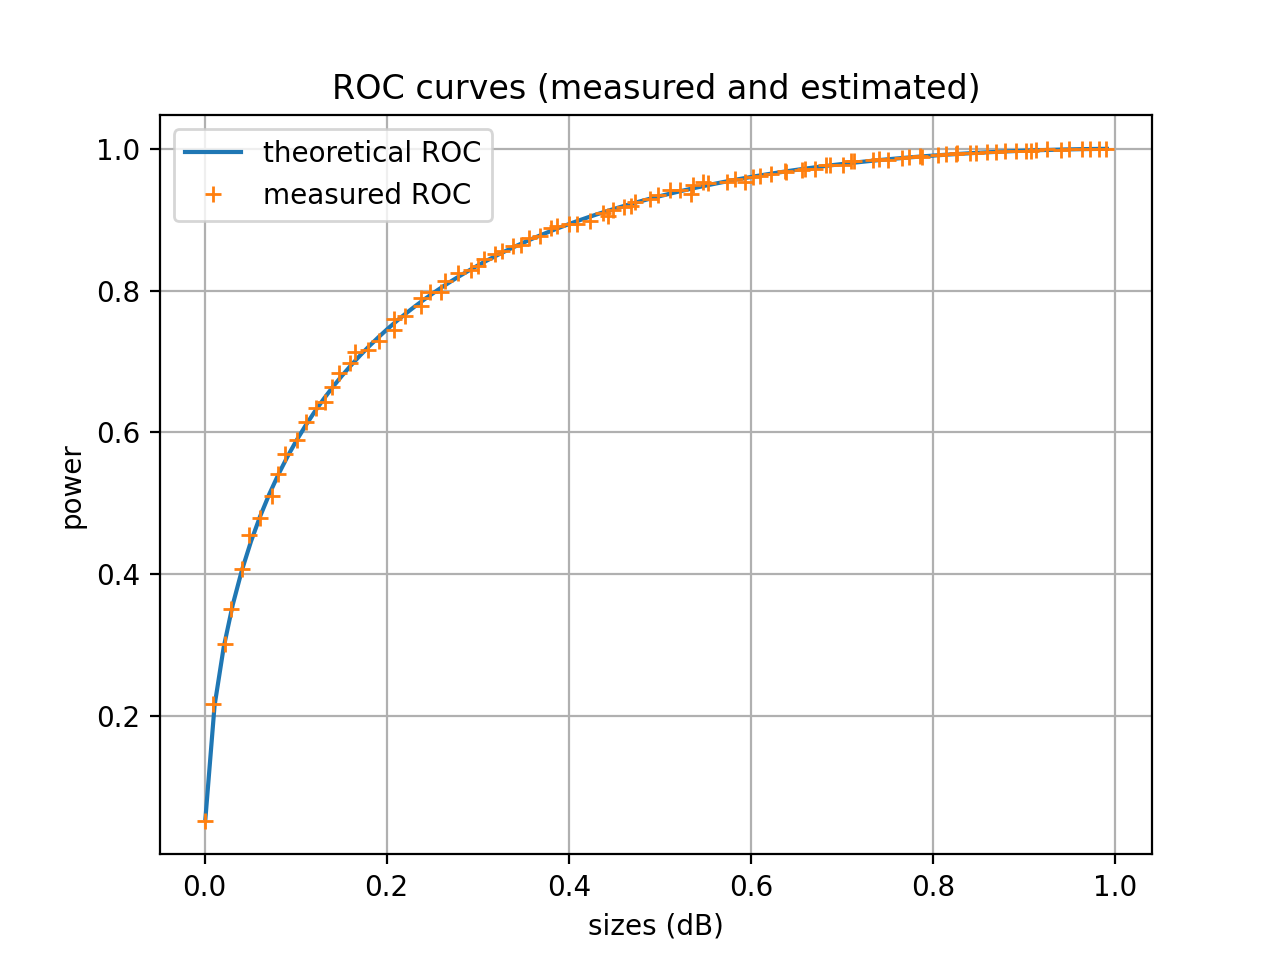

In [6]:
# Display results
h_fig, h_ax = plt.subplots() 
h_ax.plot(CV_ALPHA, v_np_power_th, label='theoretical ROC'); 
h_ax.plot(v_np_pfa_mes, v_np_power_mes, '+', label='measured ROC')
h_ax.set_xlabel('sizes (dB)'); h_ax.set_ylabel('power') 
h_ax.set_title('ROC curves (measured and estimated)'); h_ax.legend(); h_ax.grid(which='both')

## Question 4

In [7]:
m_y = C_SIGMA * randn(C_POINTS, C_DIM)

# Threshold
C_THRESHOLD_GLRT = C_SIGMA * Qinv(C_ALPHA/2)
# Decision under the null hypothesis
v_d_GLRT = abs(m_y @ V_XI_0) > C_THRESHOLD_GLRT  # @ : produit matriciel

# Size
d_pfa_mes_GLRT = mean(v_d_GLRT)
print('Estimated size   : {}'.format(d_pfa_mes_GLRT))
print('Theoretical size : {}'.format(C_ALPHA))

Estimated size   : 0.011
Theoretical size : 0.01


In [8]:
# Estimation of the power
# Generate data under H1
m_y = C_SIGMA * np.random.randn(C_POINTS, C_DIM) + C_A * V_XI_0

# Decision
v_d_GLRT = abs(m_y @ V_XI_0) > C_THRESHOLD_GLRT

# Power estimate
d_power_mes_GLRT = np.mean(v_d_GLRT)
print('Test power estimate : {}'.format(d_power_mes_GLRT))

# Theoretical power
d_power_th_GLRT = Q(Qinv(C_ALPHA/2) - C_A/C_SIGMA) + Q(Qinv(C_ALPHA/2) + C_A/C_SIGMA)
print('Theoretical power : {}'.format(d_power_th_GLRT))

Test power estimate : 0.1396
Theoretical power : 0.14102472742683697


In [9]:
# ROC curves
CV_ALPHA = np.arange(0.001,1,0.01)
v_np_power_th_GLRT = np.zeros(len(CV_ALPHA))
v_np_threshold_GLRT = np.zeros(len(CV_ALPHA))
v_np_pfa_mes_GLRT = np.zeros(len(CV_ALPHA))
v_np_power_mes_GLRT = np.zeros(len(CV_ALPHA))

for j in range(len(CV_ALPHA)):
    # Thresholds
    v_np_threshold_GLRT[j] = C_SIGMA * Qinv(CV_ALPHA[j]/2)
    # Generate data to estimate the size
    m_y_underH0_GLRT = C_SIGMA * np.random.randn(C_POINTS, C_DIM)
    # Decisions under H0
    v_d_underH0_GLRT = abs(m_y_underH0_GLRT @ V_XI_0) > v_np_threshold_GLRT[j]
    # Size estimate
    v_np_pfa_mes_GLRT[j] = np.mean(v_d_underH0_GLRT)
    # Generate data to estimate the power
    m_y_underH1_GLRT = C_SIGMA * np.random.randn(C_POINTS, C_DIM) + C_A * V_XI_0
    # Decisions under H1
    v_d_underH1_GLRT = abs(m_y_underH1_GLRT @ V_XI_0) > v_np_threshold_GLRT[j]
    # Estimated power
    v_np_power_mes_GLRT[j] = np.mean(v_d_underH1_GLRT)
    # Theoretical power
    v_np_power_th_GLRT[j] = Q(Qinv(CV_ALPHA[j]/2) - C_A/C_SIGMA) + Q(Qinv(CV_ALPHA[j]/2) + C_A/C_SIGMA)

<IPython.core.display.Javascript object>


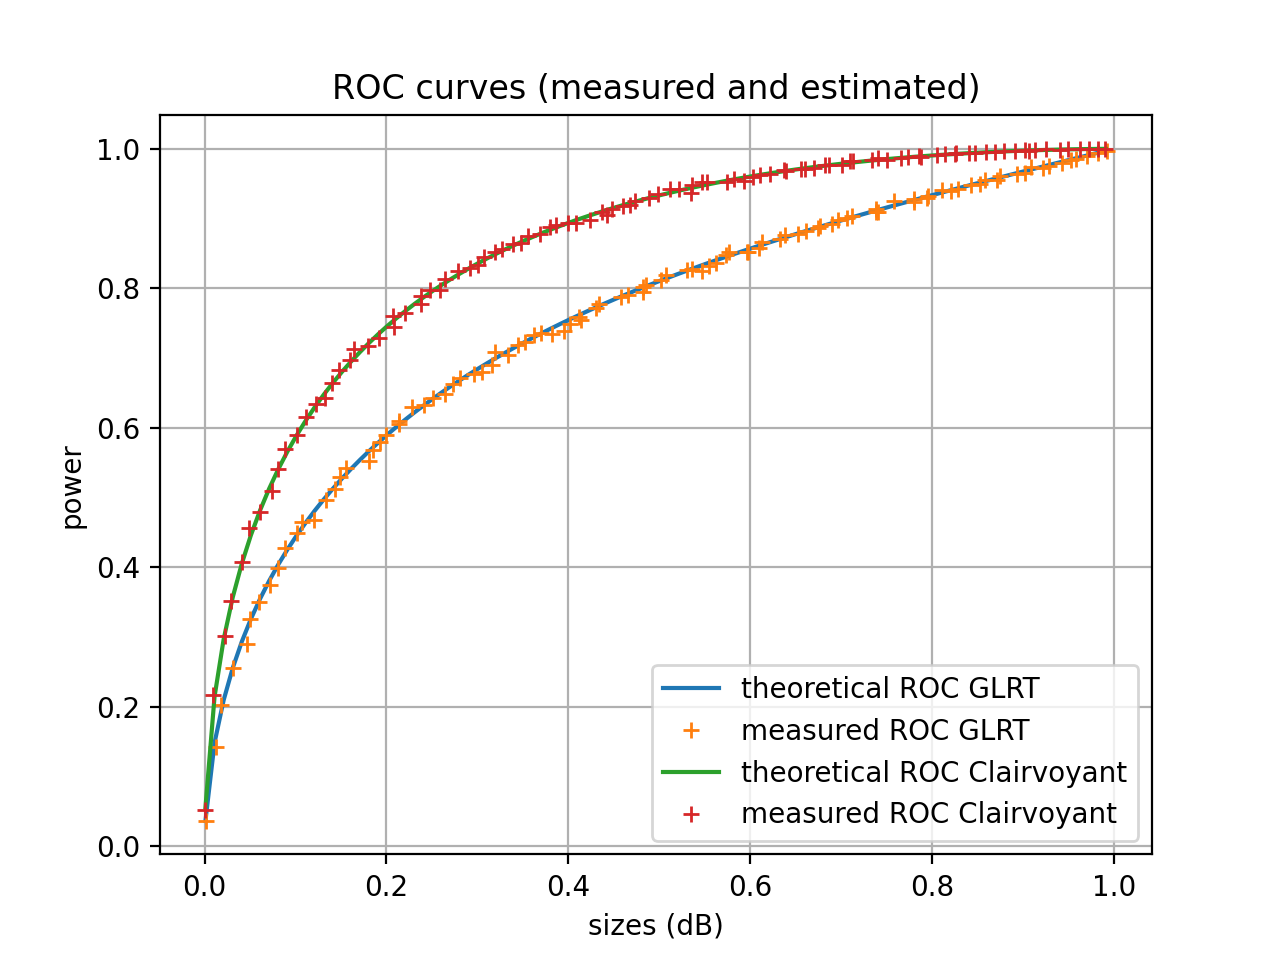

In [10]:
# Display results
h_fig, h_ax = plt.subplots() 
h_ax.plot(CV_ALPHA, v_np_power_th_GLRT, label='theoretical ROC GLRT'); 
h_ax.plot(v_np_pfa_mes_GLRT, v_np_power_mes_GLRT, '+', label='measured ROC GLRT')
h_ax.plot(CV_ALPHA, v_np_power_th, label='theoretical ROC Clairvoyant'); 
h_ax.plot(v_np_pfa_mes, v_np_power_mes, '+', label='measured ROC Clairvoyant')
h_ax.set_xlabel('sizes (dB)'); h_ax.set_ylabel('power') 
h_ax.set_title('ROC curves (measured and estimated)'); h_ax.legend(); h_ax.grid(which='both')

## Question 5

**Conclusion:** the Generalized Likelihood Ratio Test (GLRT) does not derive from a given optimality criterion but it achieves good results, as we can see in the previous figure. Also, we can note that $\beta_{Clairvoyant} > \beta_{GLRT}$. That is because, in the GLRT case, the error due to the parameter estimation (in this case $A$) needs to be added to the test error.